![dvd_image](dvd_image.jpg)

A DVD rental company needs your help! They want to figure out how many days a customer will rent a DVD for based on some features and has approached you for help. They want you to try out some regression models which will help predict the number of days a customer will rent a DVD for. The company wants a model which yeilds a MSE of 3 or less on a test set. The model you make will help the company become more efficient inventory planning.

The data they provided is in the csv file `rental_info.csv`. It has the following features:
- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

In [9]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import any additional modules and start coding below

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('rental_info.csv')

# Create `rental_length_days` column
df['rental_date'] = pd.to_datetime(df['rental_date'])
df['return_date'] = pd.to_datetime(df['return_date'])
df['rental_length_days'] = (df['return_date'] - df['rental_date']).dt.days

# Create dummy variables for `special_features`
df['deleted_scenes'] = df['special_features'].apply(lambda x: 1 if 'Deleted Scenes' in str(x) else 0)
df['behind_the_scenes'] = df['special_features'].apply(lambda x: 1 if 'Behind the Scenes' in str(x) else 0)

# Drop unnecessary or leaking columns
df = df.drop(['rental_date', 'return_date', 'special_features'], axis=1)

# Define `X` and `y`
X = df.drop('rental_length_days', axis=1)  # Features
y = df['rental_length_days']               # Target


In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)


In [12]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse_lr}")


Linear Regression MSE: 2.9417238646975883


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Tree
dt = DecisionTreeRegressor(random_state=9)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mse_dt}")

# Random Forest
rf = RandomForestRegressor(random_state=9)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")


Decision Tree MSE: 2.1675004952579413
Random Forest MSE: 2.030141907417274


In [14]:
# Identify the best model
best_model = None
best_mse = float('inf')

if mse_lr <= 3:
    best_model = lr
    best_mse = mse_lr
if mse_dt < best_mse and mse_dt <= 3:
    best_model = dt
    best_mse = mse_dt
if mse_rf < best_mse and mse_rf <= 3:
    best_model = rf
    best_mse = mse_rf

print(f"Best Model: {type(best_model).__name__}, MSE: {best_mse}")


Best Model: RandomForestRegressor, MSE: 2.030141907417274


In [15]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

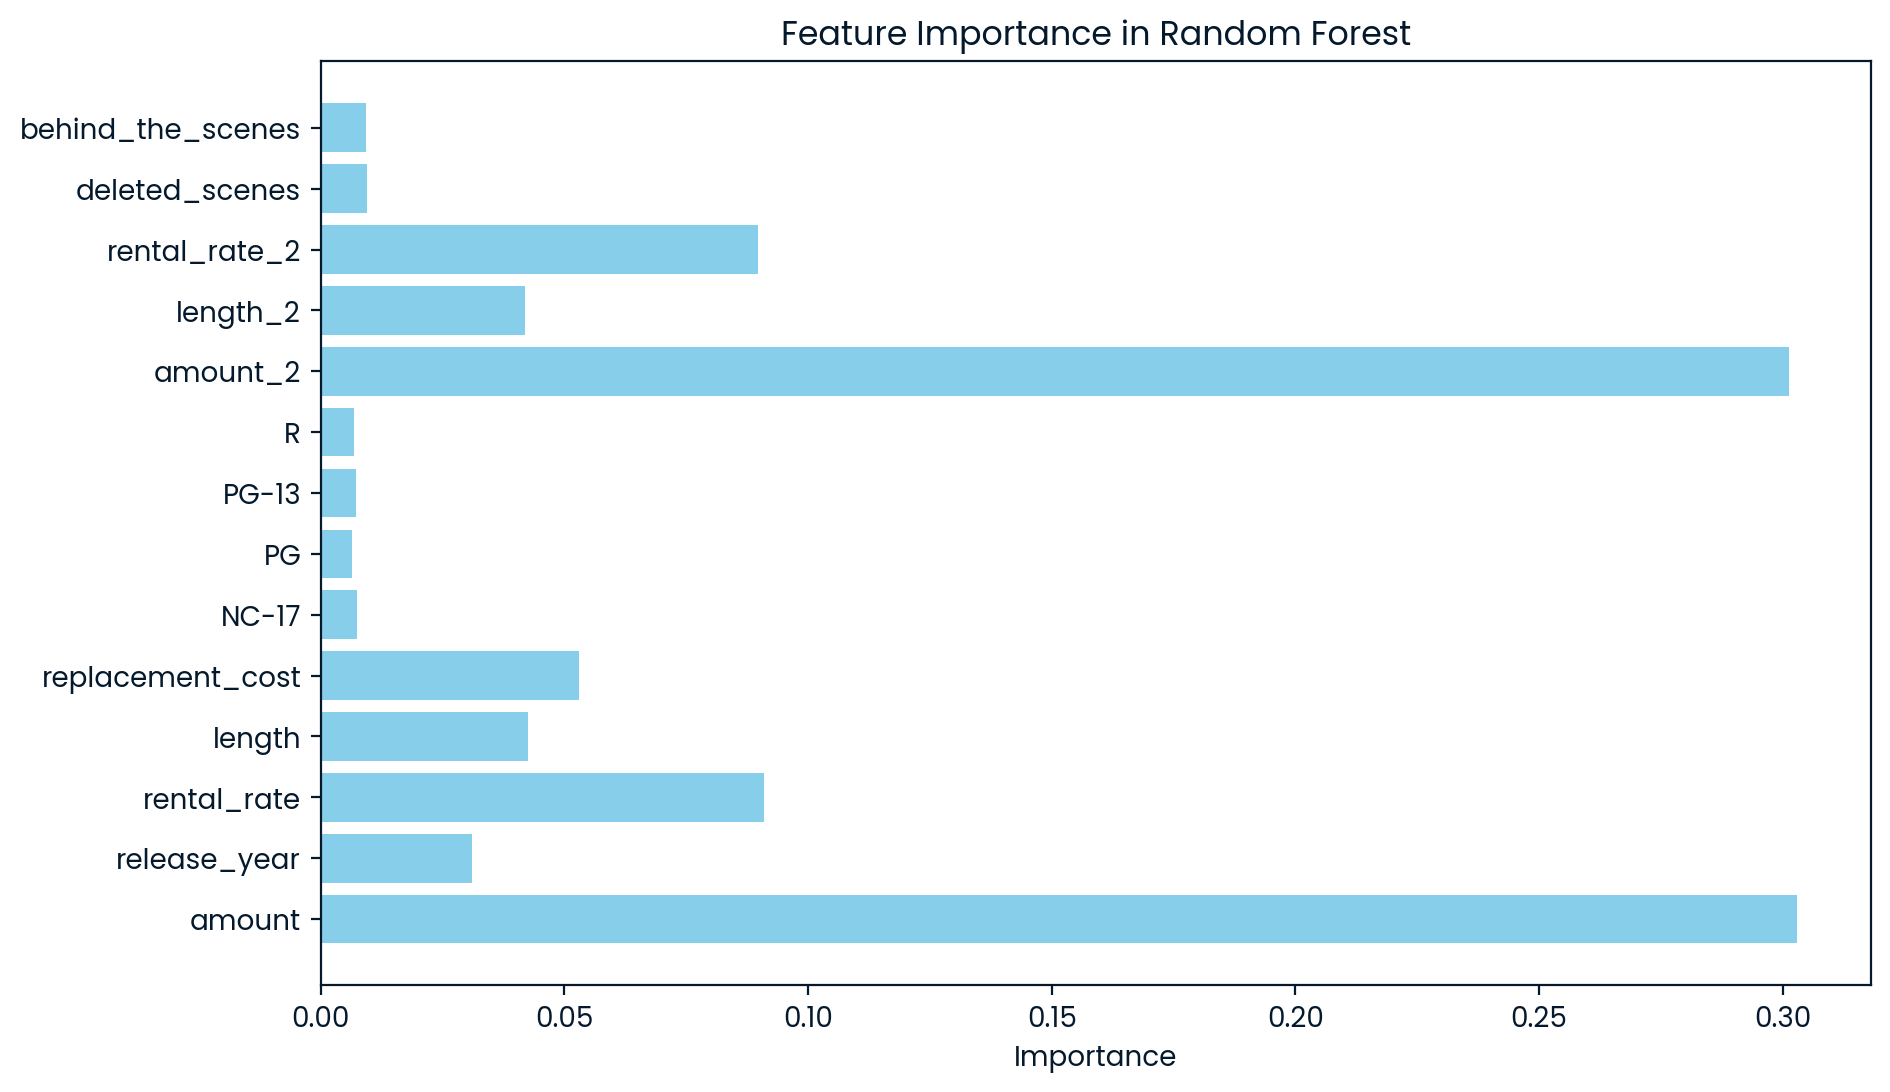

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = best_model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()
